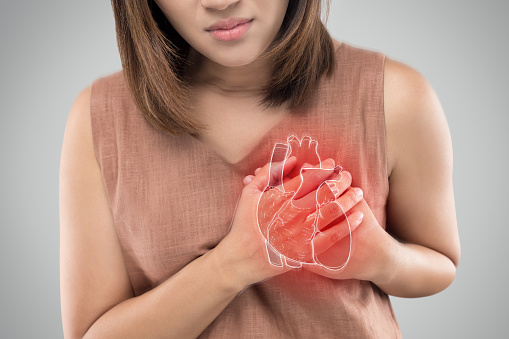

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [52]:
df = pd.read_csv('C:\\Users\\Vasu\\Documents\\Projects\\hdp\\heart.csv')

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [55]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
df.shape

(1025, 14)

In [57]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**VISUALLY CHECKING IF OUR DATA CONTAINS ANY MISSING VALUES**

<Axes: >

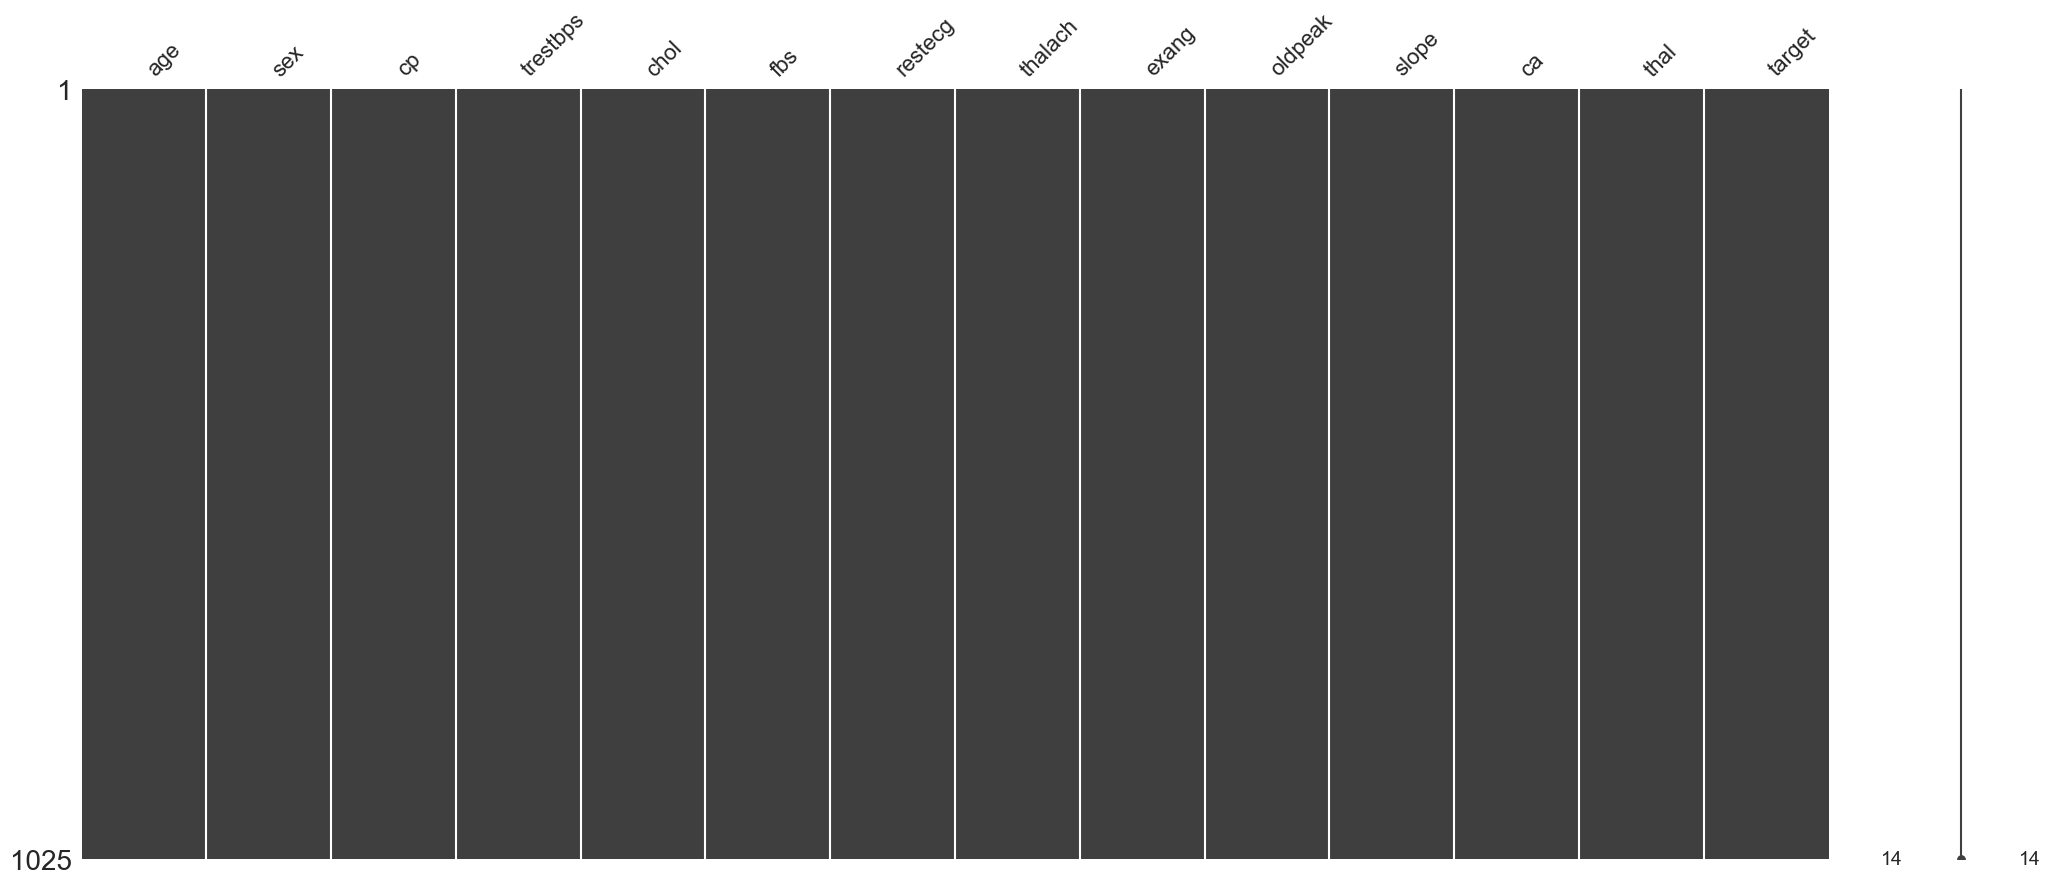

In [58]:
import missingno as msn
msn.matrix(df)

In [59]:
# Checking for missing values.
df.isnull().values.any()

False

In [60]:
# Checking for imbalanced data based on sex.
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

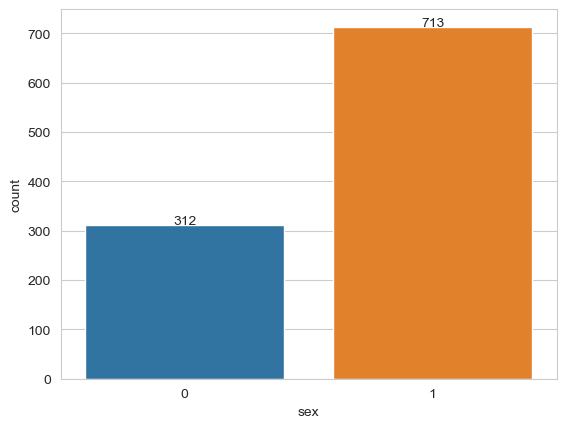

In [61]:
ax = sns.countplot(x="sex", data=df)

# Add count labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+0.3,'{:.0f}'.format(height), ha="center")

In [62]:
# Checking for imbalanced data based on outcome.
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

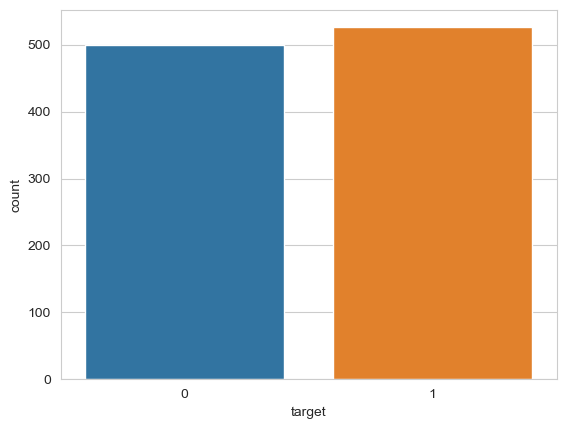

In [63]:
sns.countplot(x='target', data=df)

In [64]:
import plotly.express as px

In [65]:
Hdislabel = ['Have heart disease','Do not have heart disease']
val_counts = [508,409]
fig = px.pie(values=val_counts,names=Hdislabel,
             color=Hdislabel,
             color_discrete_map={'Have heart disease':'red',
                                 'Do not have heart disease':'#13F306'},
             title='Heart disease count')

fig.show()

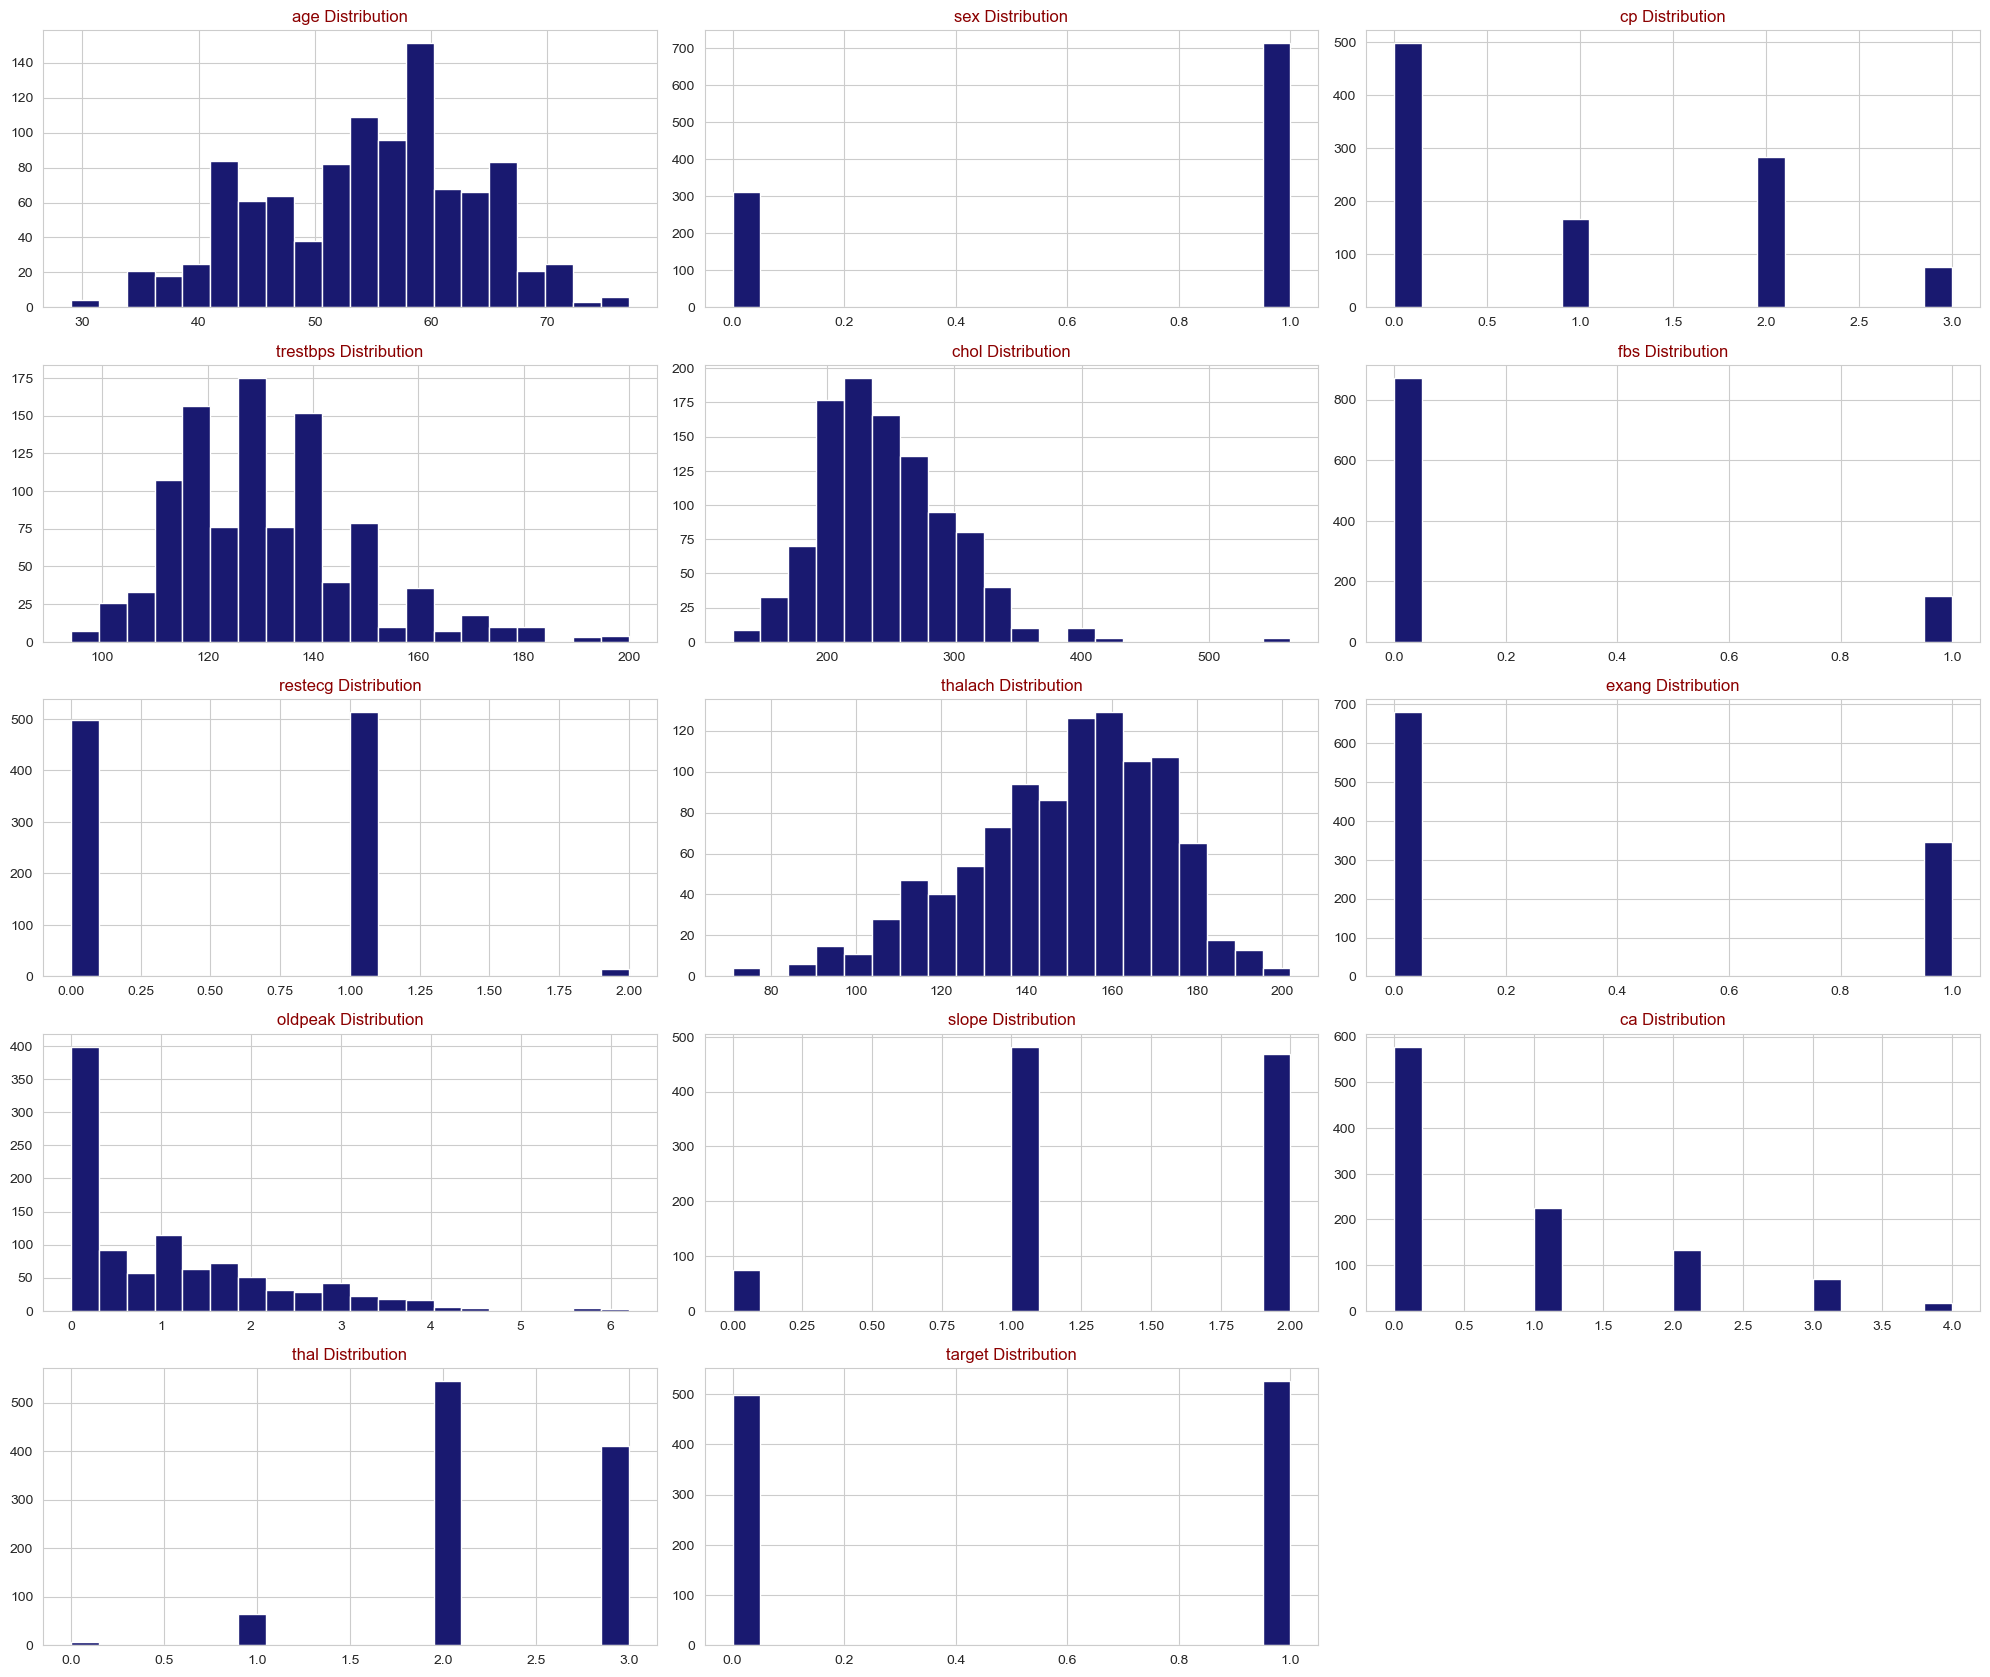

In [66]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

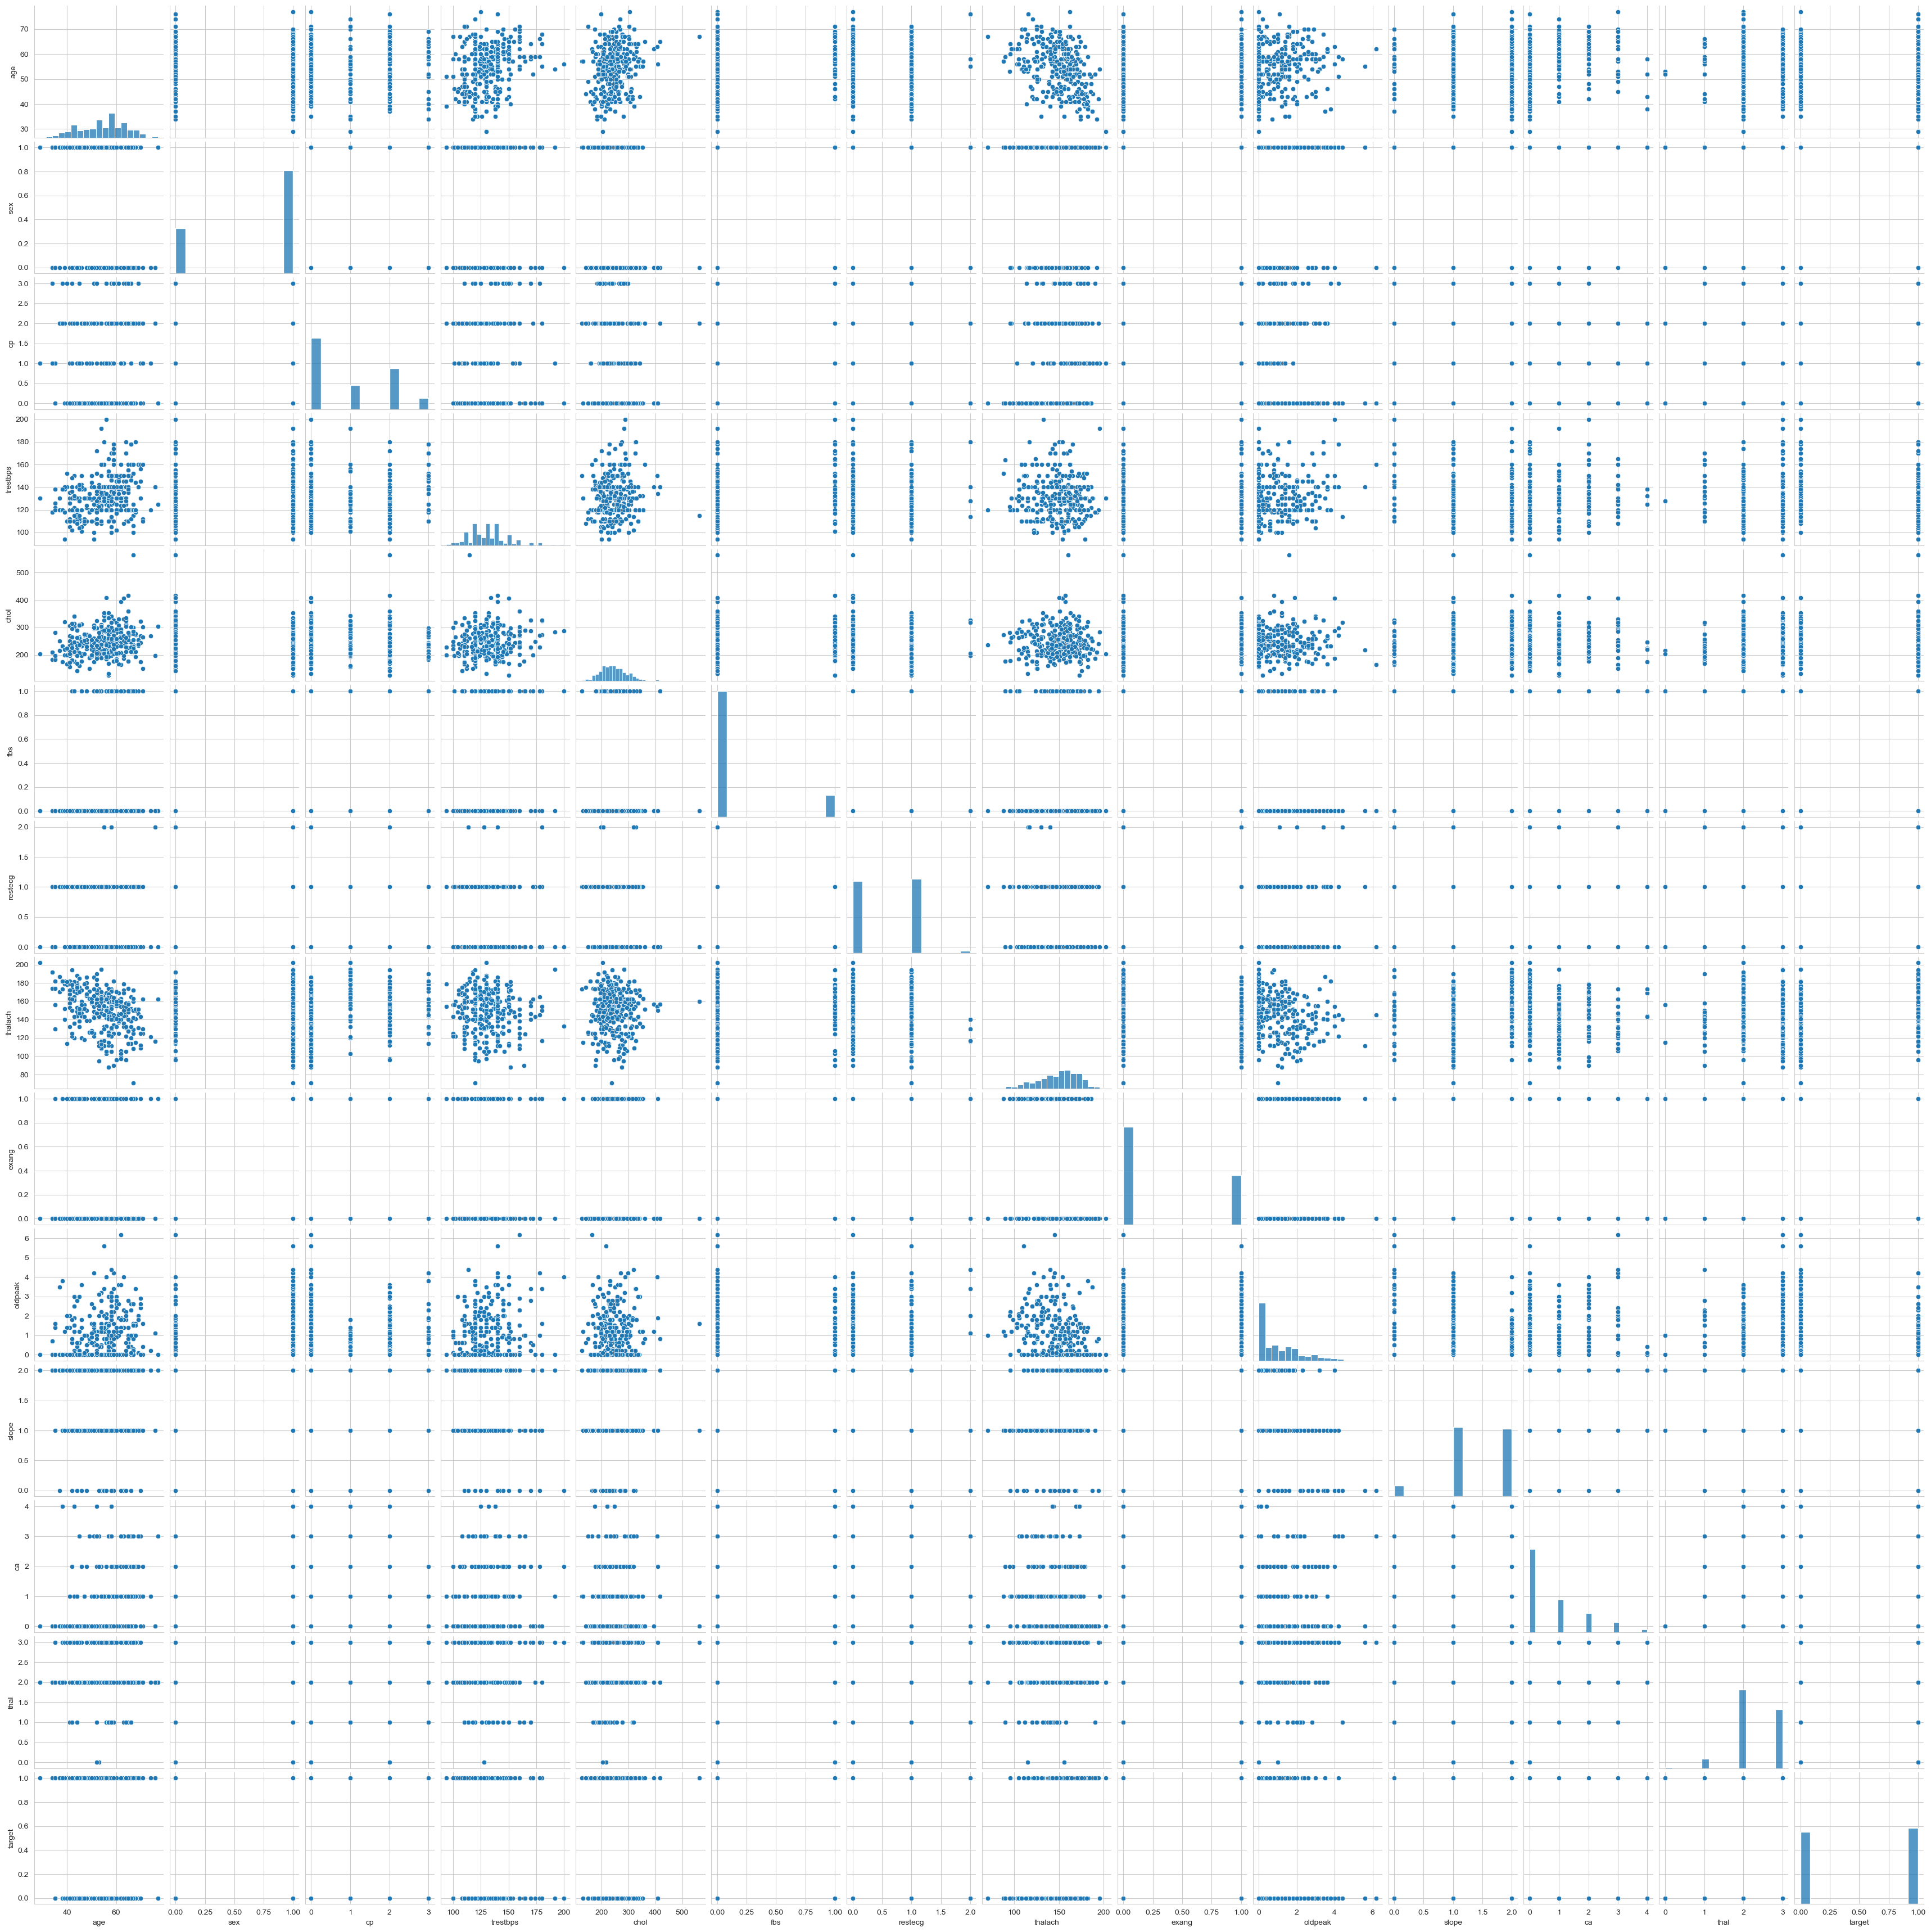

In [106]:
sns.pairplot(data=df)

In [68]:
# Checking for any correlations.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Text(0.5, -0.23, 'Fig: Annotated values of correlation coefficient of each pair of features')

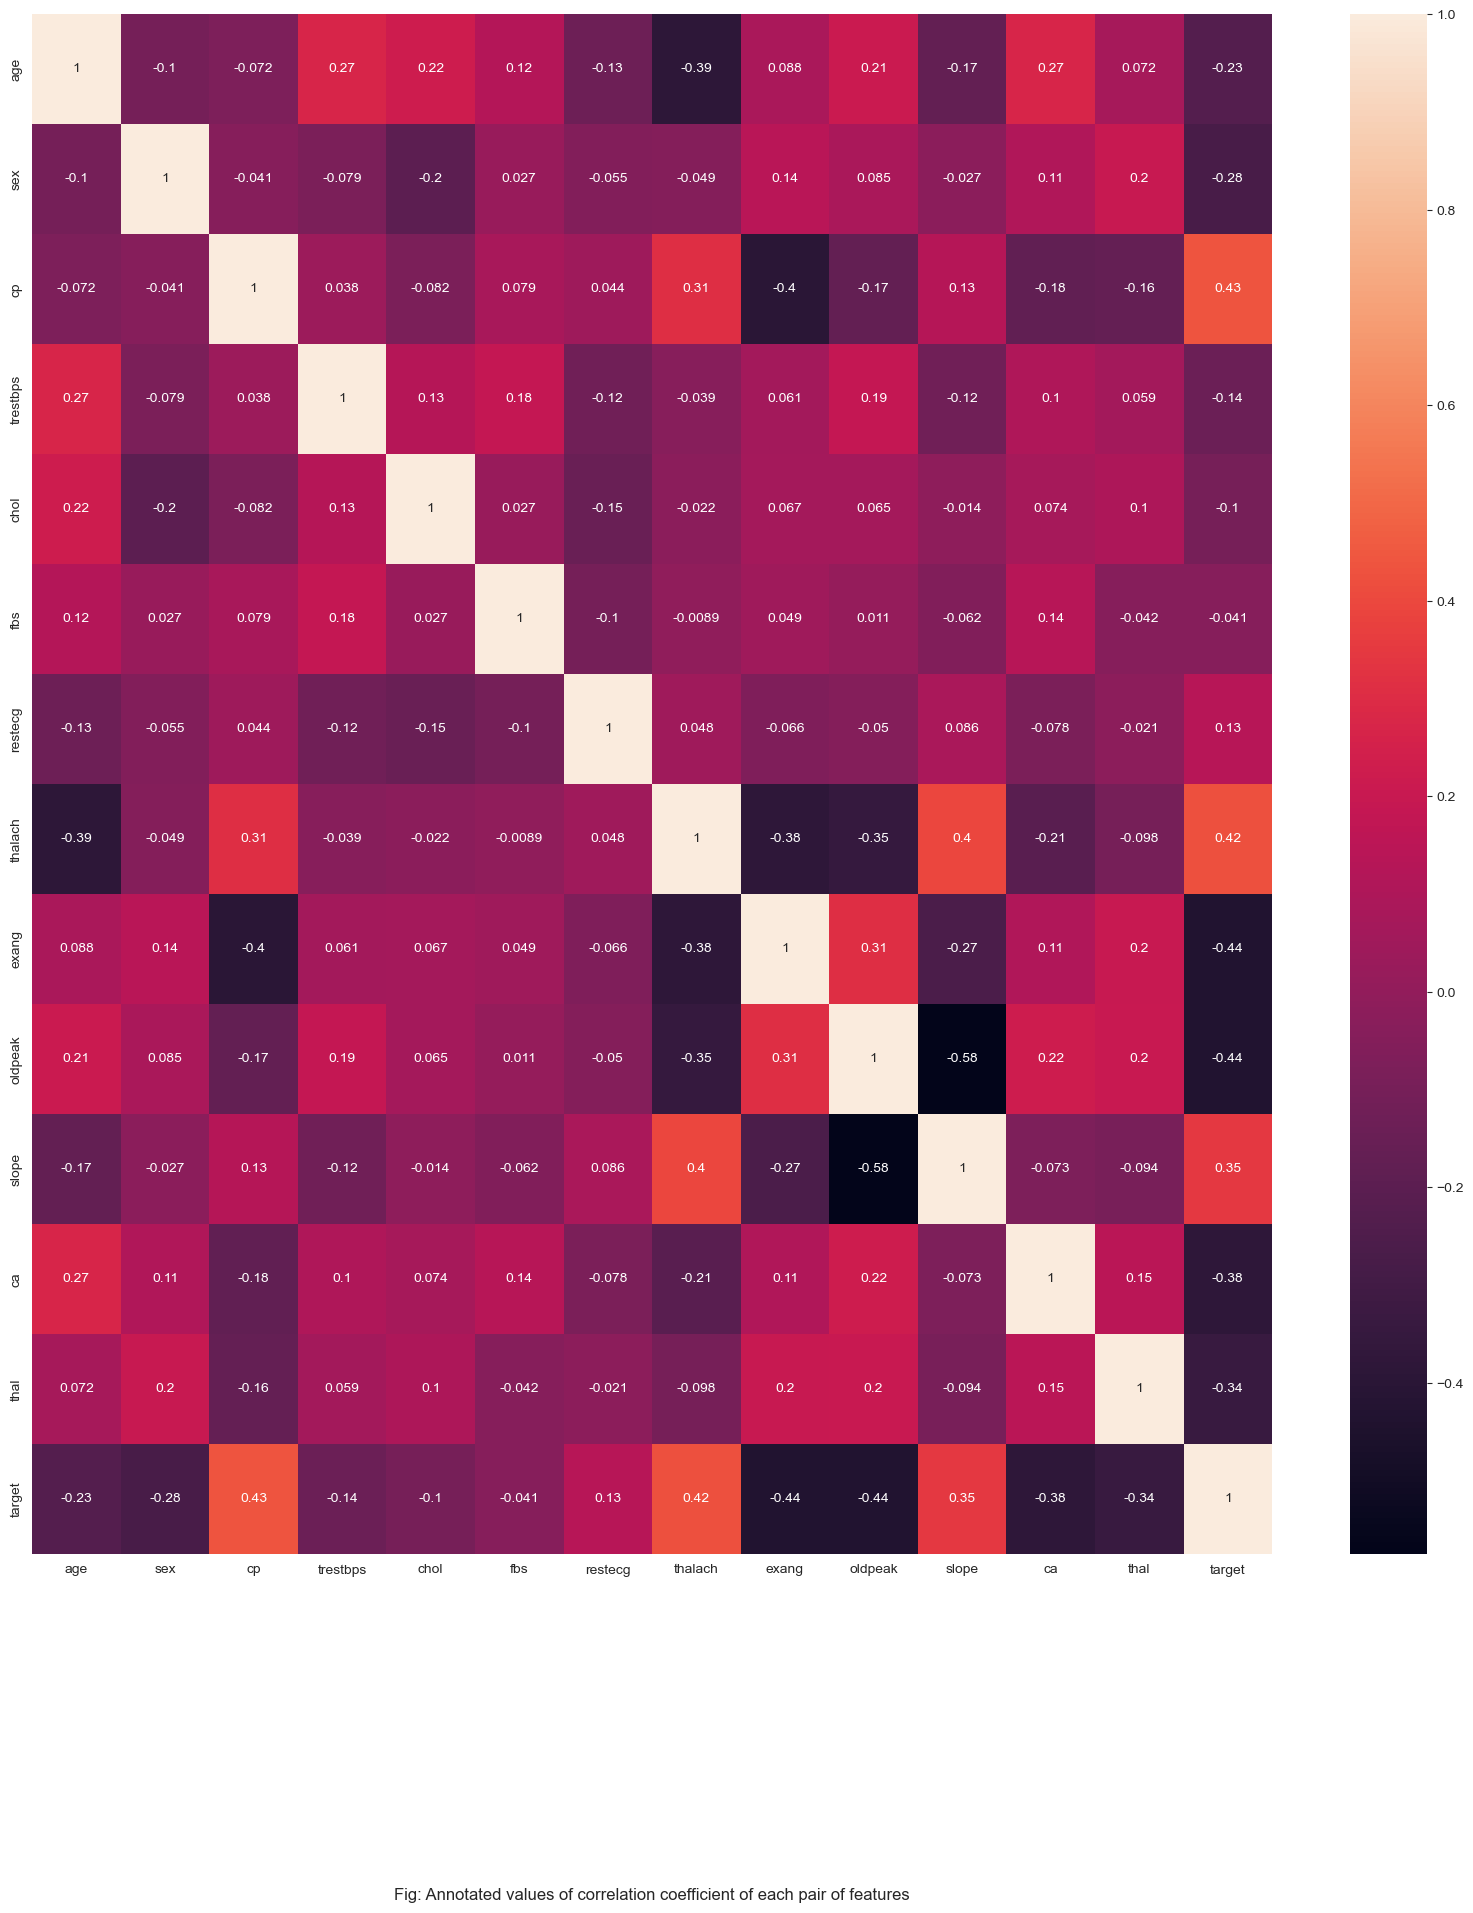

In [69]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(),annot=True)
plt.title('Fig: Annotated values of correlation coefficient of each pair of features', y=-0.23)

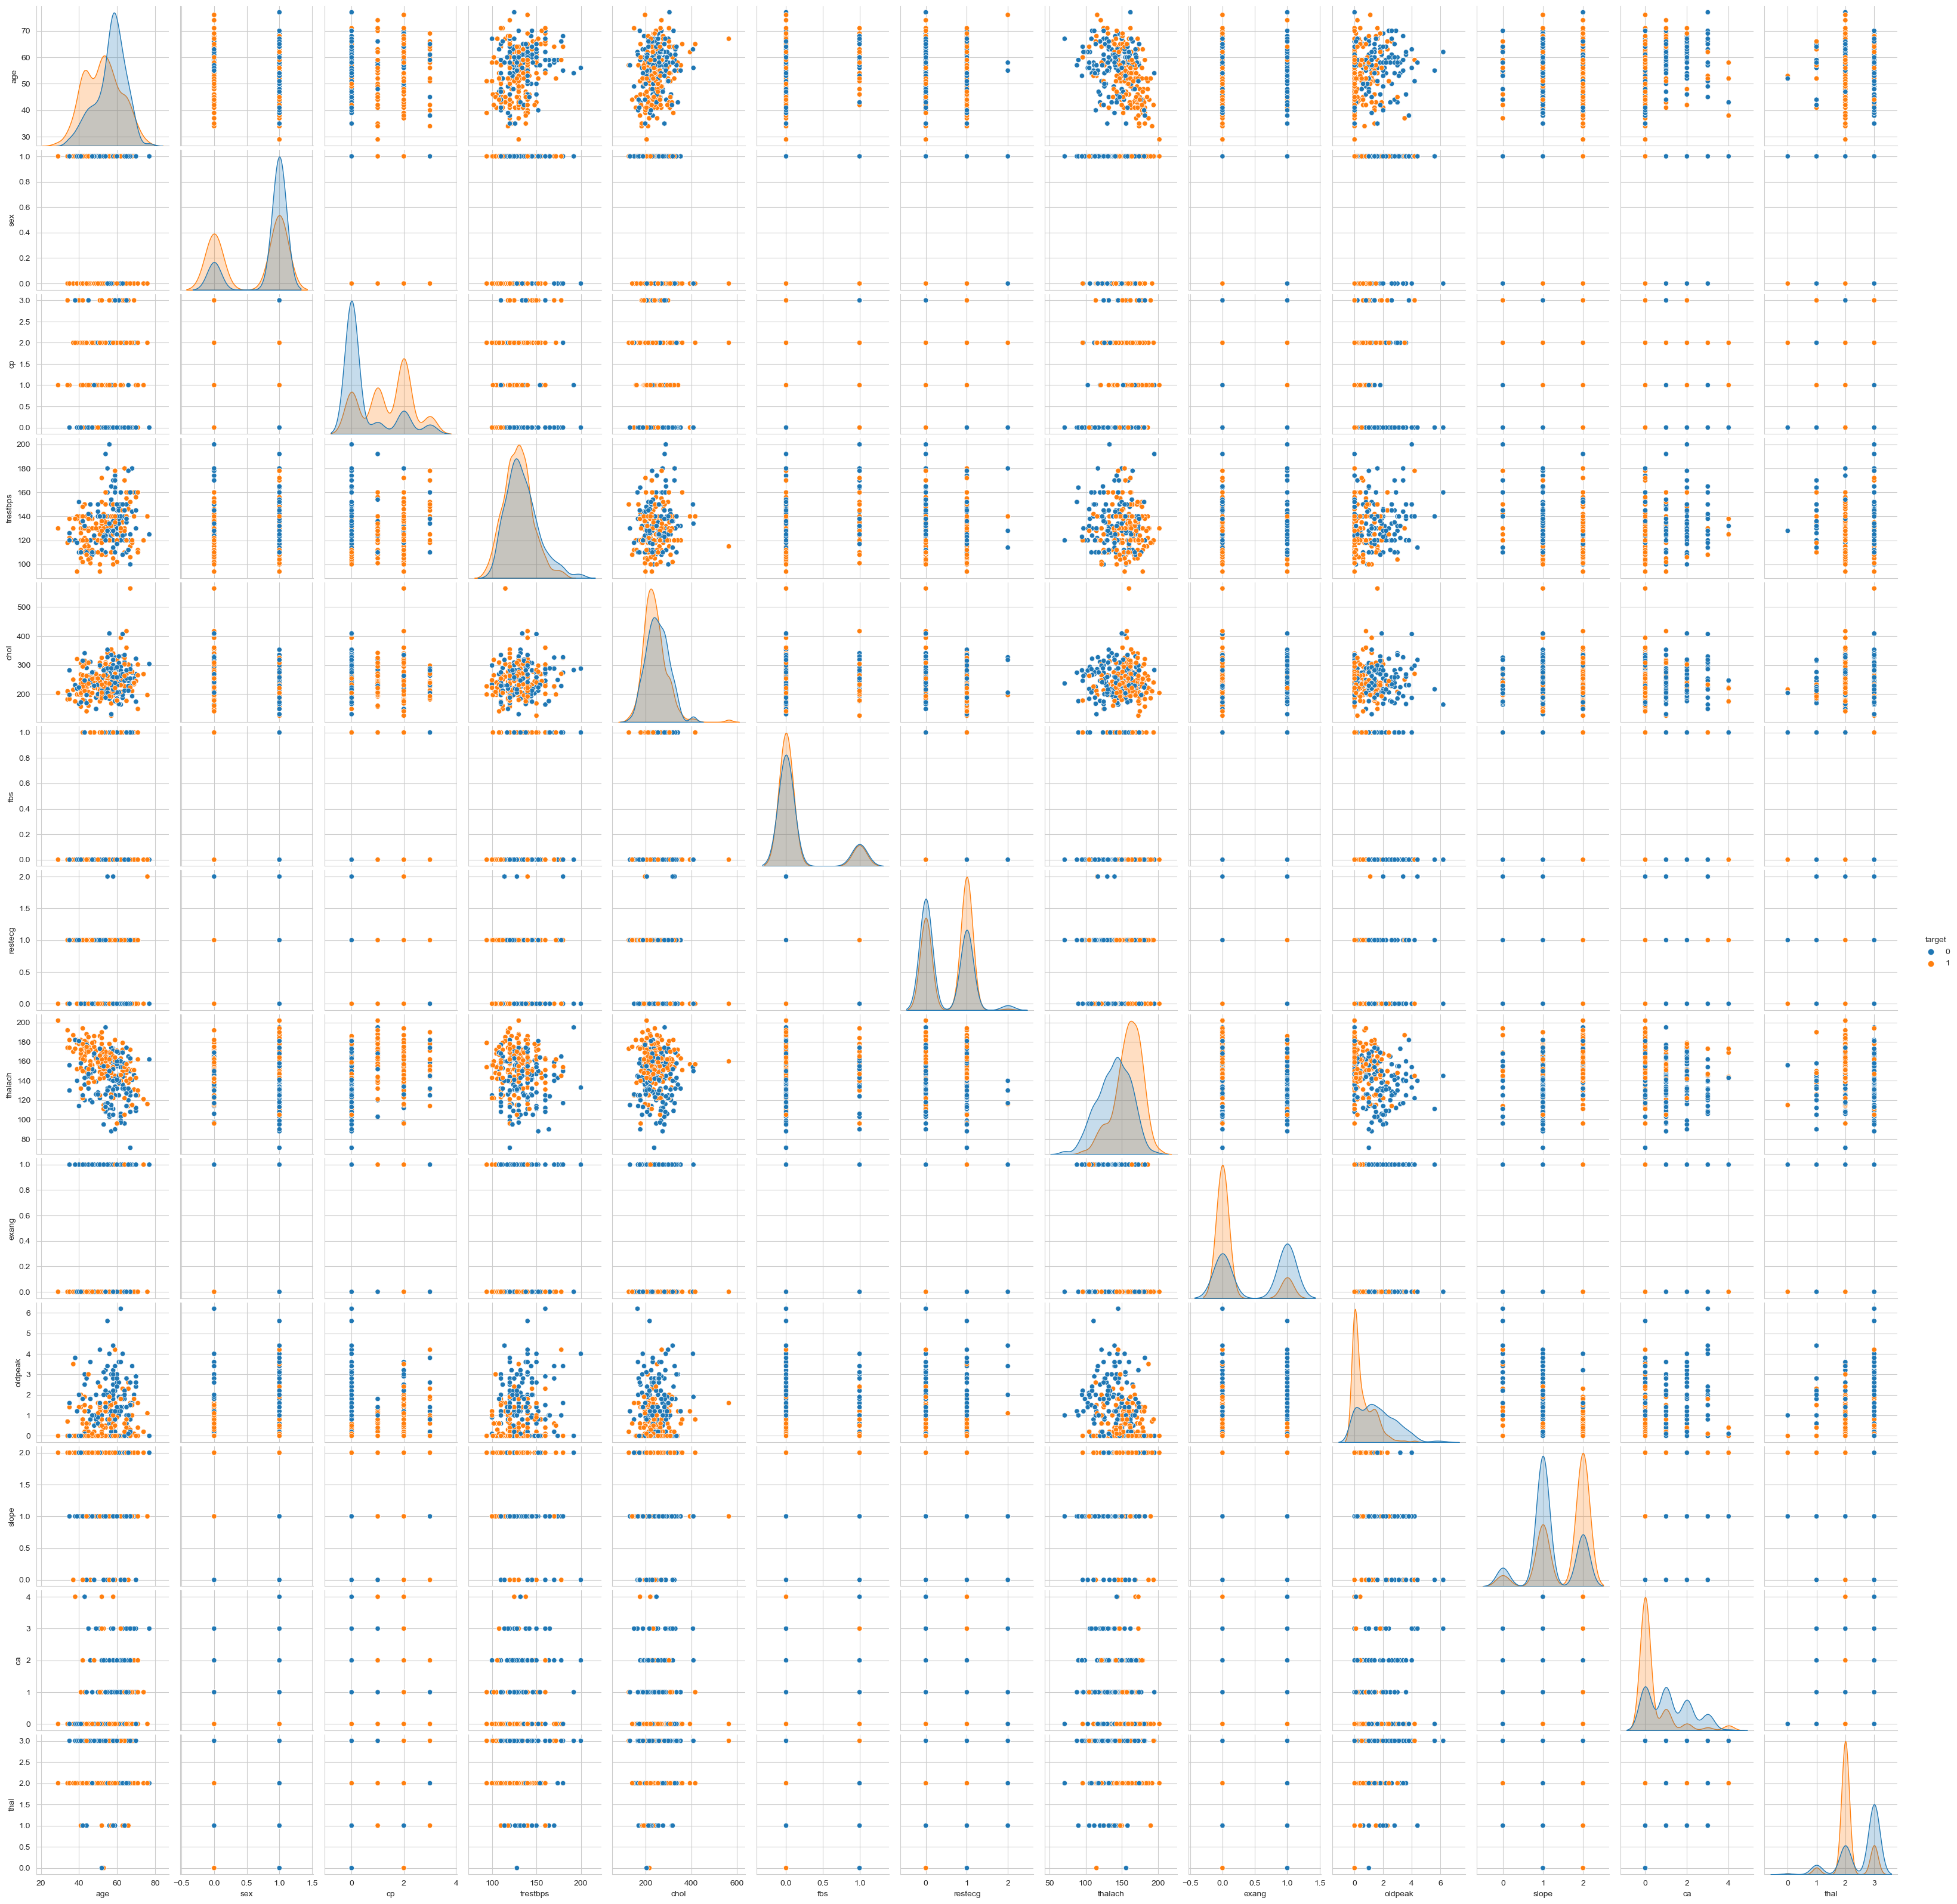

In [105]:
p=sns.pairplot(df, hue = 'target')

In [71]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [72]:
print("Shape of X before Dimensionality Reduction: ", x_train.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()  # Linear Discriminant Analysis
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

print("Shape of X after Dimensionality Reduction: ", x_train.shape)

Shape of X before Dimensionality Reduction:  (666, 12)
Shape of X after Dimensionality Reduction:  (666, 1)


In [73]:
# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [74]:
# Train individual models
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

knn_model = neighbors.KNeighborsClassifier(n_neighbors=9, p = 2, metric = 'euclidean')
knn_model.fit(x_train, y_train)

rf_model = RandomForestClassifier(n_estimators=5,random_state=6, max_depth=5)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=6)

In [75]:
# Make predictions on the test set
svm_pred = svm_model.predict(x_test)
knn_pred = knn_model.predict(x_test)
rf_pred = rf_model.predict(x_test)

In [76]:
# Evaluate individual models
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

SVM Accuracy: 0.8746518105849582
KNN Accuracy: 0.8495821727019499
Random Forest Accuracy: 0.8802228412256268


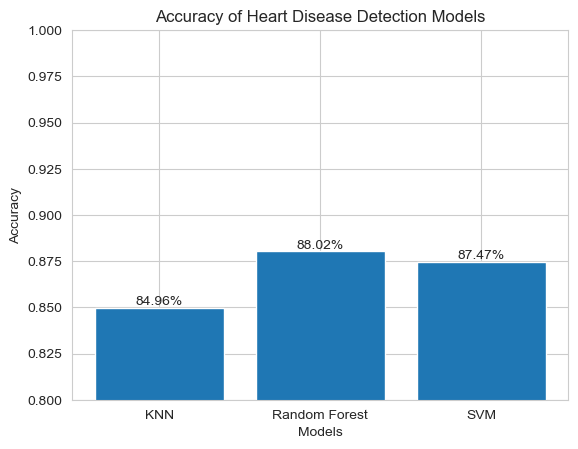

In [77]:
import matplotlib.pyplot as plt

# Accuracies of individual models
accuracies = [knn_accuracy, rf_accuracy, svm_accuracy]

# Model names
models = ['KNN', 'Random Forest', 'SVM']

# Plotting the bar plot
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Heart Disease Detection Models')
plt.ylim(0.8, 1)  # Adjust the y-axis limits if needed

# Add value annotations on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom')

plt.show()


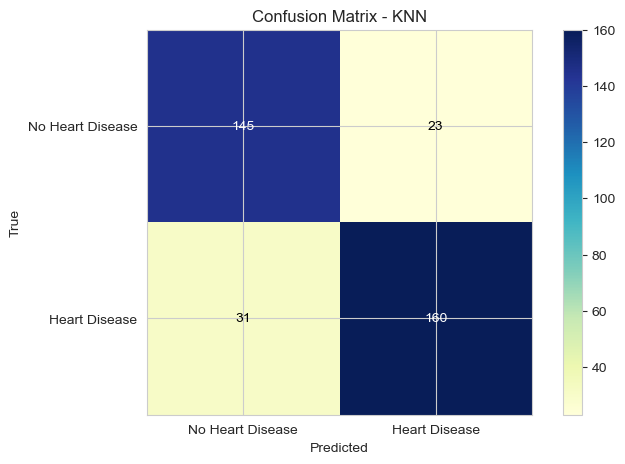

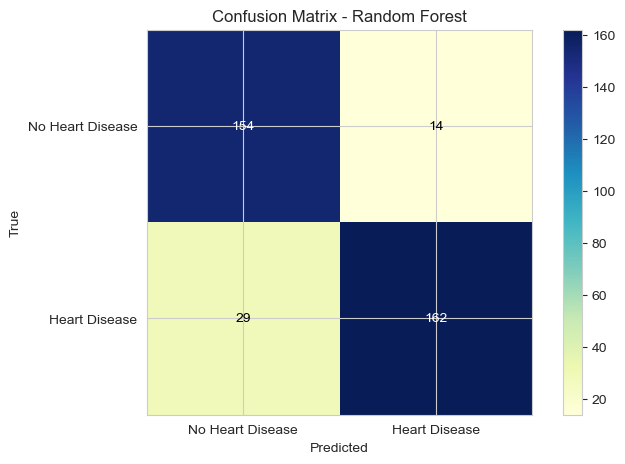

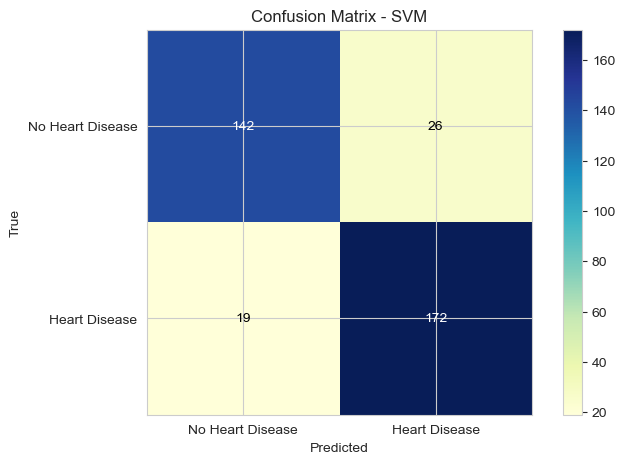

In [78]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for each model
knn_cm = confusion_matrix(y_test, knn_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

# Function to print the confusion matrix
def print_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 5))
    plt.imshow(cm, interpolation='nearest', cmap="YlGnBu")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
    plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

# Print the confusion matrices
print_confusion_matrix(knn_cm, 'KNN')
print_confusion_matrix(rf_cm, 'Random Forest')
print_confusion_matrix(svm_cm, 'SVM')


# **ENSEMBLE & BOOSTING**

In [97]:
''' ENSEMBLE '''
ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('knn', knn_model), ('rf', rf_model)], voting='hard')
ensemble_model.fit(x_train, y_train)
ensemble_pred = ensemble_model.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)
'''--------------------------------------------------------------------------------------------------------------------------'''
''' BOOSTING '''
# I HAVE USED EXTREME GRADIENT BOOSTING AS IT IS MORE EFFICIENT AND RELIABLE.
# TRIED WITH ADABOOST, BUT IT OVER-FITTED THE MODEL.
import xgboost as xgb
params = {'max_depth': 3,
          'learning_rate': 0.1,
          'n_estimators': 100,
          'objective': 'binary:logistic',
          'random_state': 42}
boosted_model = xgb.XGBClassifier(**params)
boosted_model.fit(x_train, y_train)
boosted_pred = boosted_model.predict(x_test)
boosted_accuracy = accuracy_score(y_test, boosted_pred)
print("Boosted Accuracy:", boosted_accuracy)

Ensemble Accuracy: 0.8635097493036211
Boosted Accuracy: 0.8997214484679665


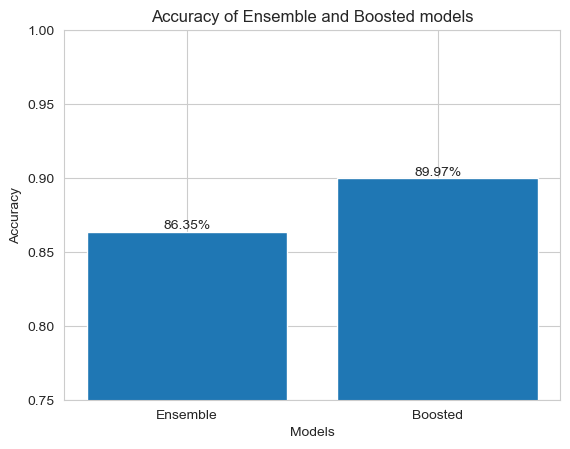

In [100]:
import matplotlib.pyplot as plt

# Accuracies of ensemble and boosted models
accuracies = [ensemble_accuracy, boosted_accuracy]

# Model names
models = ['Ensemble', 'Boosted']

# Plotting the bar plot
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ensemble and Boosted models')
plt.ylim(0.75, 1)  # Adjust the y-axis limits if needed

# Add value annotations on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom')

plt.show()


# **PERFORMING K FOLD CROSS VALIDATION TO CHECK OVERFITTING**

In [108]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score

# Define the KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the machine learning model
model = boosted_model

# Initialize empty lists to store the accuracies and AUCs
accuracies = []
aucs = []
precisions = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the target variable for the test data
    y_pred = model.predict(X_test)

    # Predict the target variable probabilities for the test data
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute the accuracy score and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Compute precision score and store it into the list
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Compute the AUC score and store it in the list
    auc = roc_auc_score(y_test, y_proba)
    aucs.append(auc)

    # Print the accuracy, precision, and AUC scores for the current fold
    print('Accuracy: %.3f, Precision: %.3f, AUC: %.3f' % (accuracy, precision, auc))

# Compute the mean accuracy, precision, and AUC across all folds
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_auc = sum(aucs) / len(aucs)
print('Mean accuracy: %.3f, Mean precision: %.3f, Mean AUC: %.3f' % (mean_accuracy, mean_precision, mean_auc))


Accuracy: 0.927, Precision: 0.931, AUC: 0.973
Accuracy: 0.956, Precision: 0.953, AUC: 0.994
Accuracy: 0.951, Precision: 0.948, AUC: 0.994
Accuracy: 0.976, Precision: 0.960, AUC: 0.999
Accuracy: 0.927, Precision: 0.925, AUC: 0.987
Mean accuracy: 0.947, Mean precision: 0.944, Mean AUC: 0.989


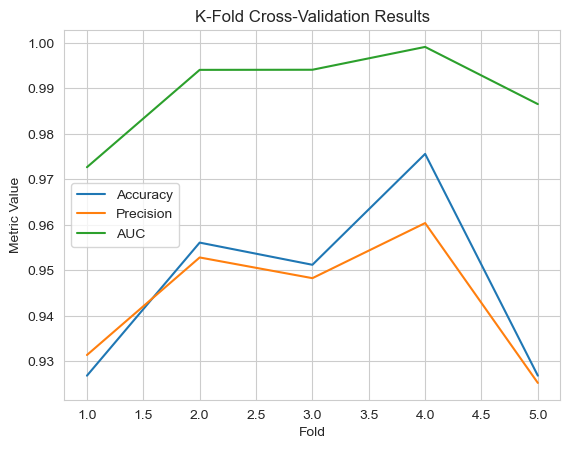

In [109]:
# Create an array representing the fold numbers
fold_numbers = np.arange(1, len(accuracies) + 1)

# Plot the accuracies
plt.plot(fold_numbers, accuracies, label='Accuracy')

# Plot the precisions
plt.plot(fold_numbers, precisions, label='Precision')

# Plot the AUCs
plt.plot(fold_numbers, aucs, label='AUC')

# Set the labels and title
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.title('K-Fold Cross-Validation Results')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# ** MANUAL TESTING DATA OBTAINED FROM AN ACTUAL PATIENT **

In [103]:
'''Manual testing of an actual heart disease patient's reports'''
# answer must be 1 (Disease risk detected)
import numpy as np
myData = np.array([[23, 0, 1, 127, 232, 0, 1, 168, 0, 1, 2, 2]])  # Reshape to a 2D array

# Predict using the trained model
prediction = boosted_model.predict(myData)

if prediction[0]:
    print("Caution! Heart Disease Risk is high, kindly book a checkup with your doctor.")
else:
    print("Congratulations! Your heart seems to be in perfect condition.")

Caution! Heart Disease Risk is high, kindly book a checkup with your doctor.


In [104]:
''' Manual testing for a healthy adult '''

secondData = np.array([[53, 0, 0, 146, 298, 1, 0, 168, 0, 1.8, 2, 3]])
ans = boosted_model.predict(secondData)
if not ans:
    print("Congratulations! Your heart seems to be in perfect condition.")
else:
    print("Caution! Heart Disease Risk is high, kindly book a checkup with your doctor.")

Congratulations! Your heart seems to be in perfect condition.
